# Kaggle Competition: Santander Customer Satisfaction

In [1]:
# import all the things
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [2]:
santrainder = pd.read_csv('train.csv')
santestder = pd.read_csv('test.csv')

# data at a glance

In [3]:
print santrainder.shape
print santestder.shape
santrainder.head()
print santrainder.columns

(76020, 371)
(75818, 370)
Index([u''ID', u'var3', u'var15', u'imp_ent_var16_ult1',
       u'imp_op_var39_comer_ult1', u'imp_op_var39_comer_ult3',
       u'imp_op_var40_comer_ult1', u'imp_op_var40_comer_ult3',
       u'imp_op_var40_efect_ult1', u'imp_op_var40_efect_ult3',
       ...
       u'saldo_medio_var33_hace2', u'saldo_medio_var33_hace3',
       u'saldo_medio_var33_ult1', u'saldo_medio_var33_ult3',
       u'saldo_medio_var44_hace2', u'saldo_medio_var44_hace3',
       u'saldo_medio_var44_ult1', u'saldo_medio_var44_ult3', u'var38',
       u'TARGET'],
      dtype='object', length=371)


In [4]:
# Unhappy campers are categorized as 1's.
print santrainder.TARGET.value_counts()
# 3008/76022 = 4% rate of discontent

0    73012
1     3008
Name: TARGET, dtype: int64


In [5]:
santrainder.describe().to_csv(path_or_buf="santrainder_describe.csv")

In [6]:
# 9999999999 is likely an error number (appears in delta variables)
santrainder = santrainder.replace(9999999999, np.nan)
santrainder.dropna(inplace=True)

In [7]:
santrainder.shape

(75485, 371)

Error for var3 is addressed in the var3 section.

# var3 is nationality I guess


In [8]:
# var3
santrainder.var3.value_counts()[0:20]

 2         73658
 8           135
-999999      116
 9           110
 3           107
 1           102
 7            95
 13           94
 12           84
 4            84
 6            80
 0            75
 10           71
 11           66
 5            63
 14           61
 15           33
 18           10
 16            9
 17            7
Name: var3, dtype: int64

In [9]:
# var3 error -999999, 117 of them
# 117/77060 = 0.0015 (not even 1% of the entries)
# drop as null or replace with mode (category 2)?
santrainder = santrainder.replace(-999999,2) 

In [29]:
santrainder.var3.value_counts()[0:20]

2     73774
8       135
9       110
3       107
1       102
7        95
13       94
12       84
4        84
6        80
0        75
10       71
11       66
5        63
14       61
15       33
18       10
16        9
17        7
23        7
Name: var3, dtype: int64

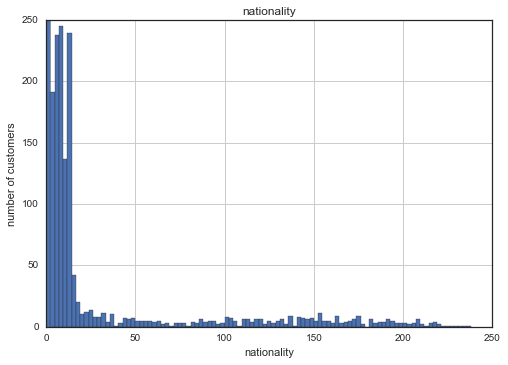

In [34]:
# distribution
santrainder.var3.hist(bins=100)
plt.xlabel('nationality')
plt.ylabel('number of customers')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,250)) # country 2 is off the charts with this range
plt.title('nationality')
plt.show()

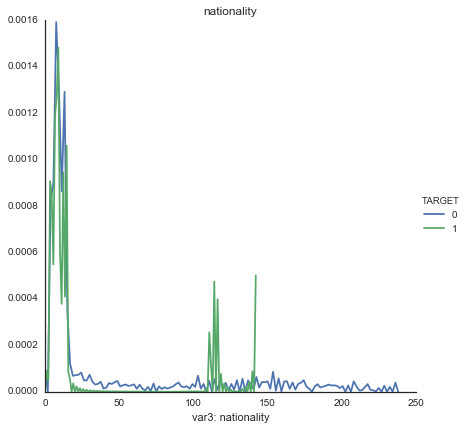

In [27]:
# kernel density estimation (probability density function) because histogram is weird
sns.FacetGrid(santrainder, hue='TARGET', size=6) \
   .map(sns.kdeplot, 'var3') \
   .add_legend()
plt.title('nationality');
plt.xlabel('var3: nationality');
# There might be something to living in a country in the category 110-140 range.

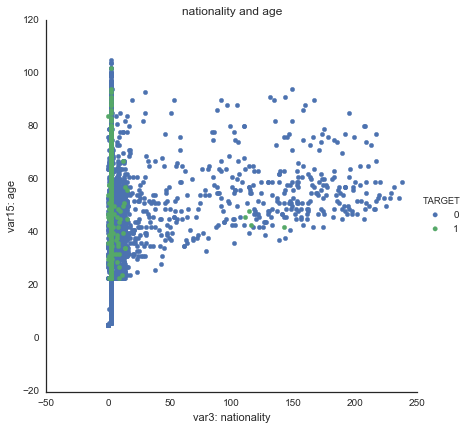

In [13]:
sns.FacetGrid(santrainder, hue='TARGET', size=6) \
   .map(plt.scatter, 'var3', 'var15') \ # scatter plot
   .add_legend()
plt.title('nationality and age');
plt.xlabel('var3: nationality');
plt.ylabel('var15: age');
# yeeeeeah, no. Not unless you're in a country in the category 110-140 range.

# var15 sure looks like age

In [20]:
# what is var15?
# maybe age
santrainder.var15.describe()

count    75485.000000
mean        33.100894
std         12.872810
min          5.000000
25%         23.000000
50%         27.000000
75%         39.000000
max        105.000000
Name: var15, dtype: float64

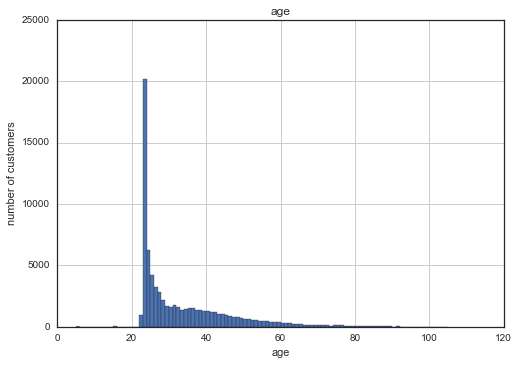

In [21]:
# distribution
santrainder.var15.hist(bins=100)
plt.xlabel('age')
plt.ylabel('number of customers')
plt.title('age')
plt.show()

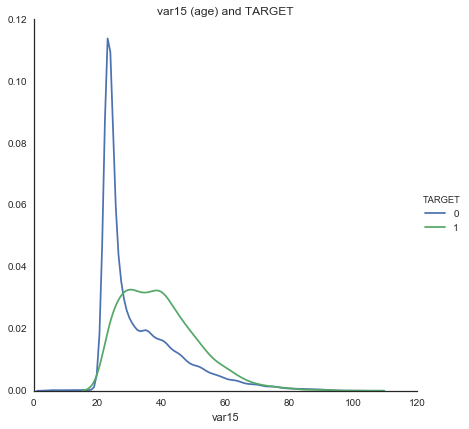

In [22]:
sns.FacetGrid(santrainder, hue='TARGET', size=6) \
   .map(sns.kdeplot, "var15") \ # kernel density estimation (probability density function)
   .add_legend()
plt.title('var15 (age) and TARGET');

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
feature_cols = ['var15']
X = santrainder[feature_cols]
y = santrainder.TARGET
logreg.fit(X, y)
santrainder['age_pred'] = logreg.predict(X)

In [ ]:
# array of logreg coefficients


In [45]:
print santrainder['age_pred'].describe()
logreg.coef_

count    75485.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: age_pred, dtype: float64


array([[ 0.03088869]])

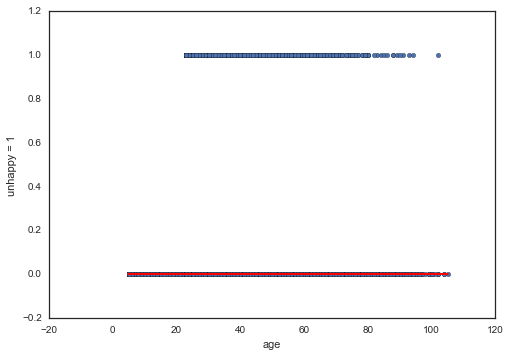

In [43]:
plt.scatter(santrainder.var15, santrainder.TARGET)
plt.plot(santrainder.var15, santrainder.age_pred, color='red')
plt.xlabel('age')
plt.ylabel('unhappy = 1')

# num_var4 is bank product count

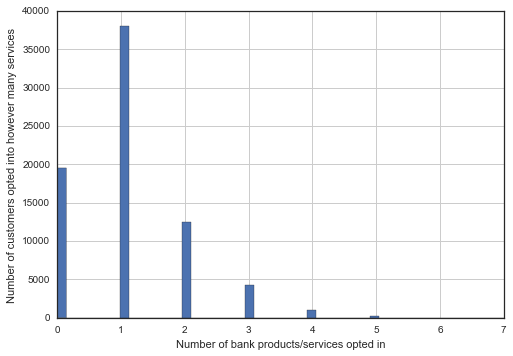

In [43]:
santrainder.num_var4.hist(bins=50)
plt.xlabel('Number of bank products/services opted in')
plt.ylabel('Number of customers opted into however many services')

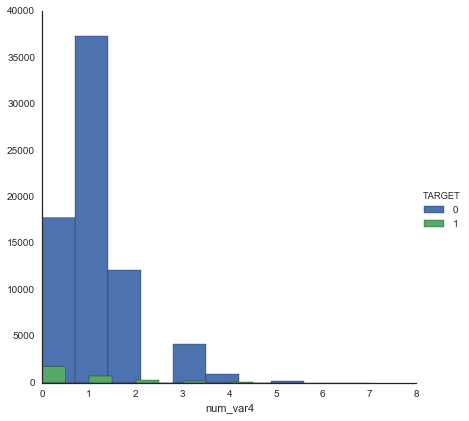

In [45]:
sns.FacetGrid(santrainder, hue='TARGET', size=6) \
    .map(plt.hist, 'num_var4', bins=10) \
    .add_legend()

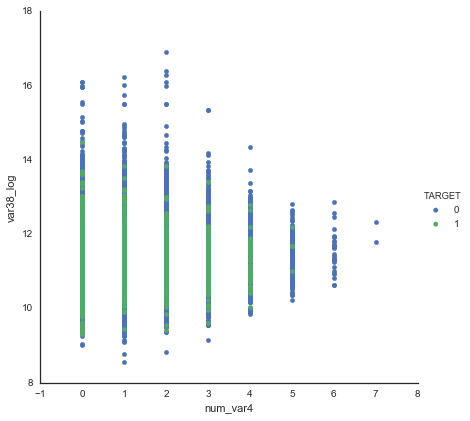

In [46]:
sns.FacetGrid(santrainder, hue='TARGET', size=6) \
    .map(plt.scatter, 'num_var4', 'var38_log') \
    .add_legend()

# var36 is what

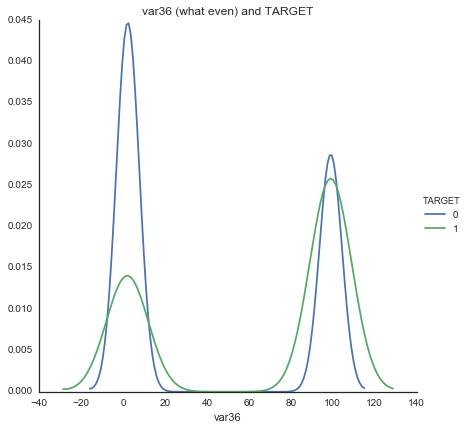

In [36]:
sns.FacetGrid(santrainder, hue='TARGET', size=6) \
   .map(sns.kdeplot, 'var36') \
   .add_legend()
plt.title('var36 (what even) and TARGET');

# var38 is mortgage value

In [23]:
santrainder.var38.describe()

count    7.548500e+04
mean     1.170877e+05
std      1.824976e+05
min      5.163750e+03
25%      6.777804e+04
50%      1.063009e+05
75%      1.185951e+05
max      2.203474e+07
Name: var38, dtype: float64

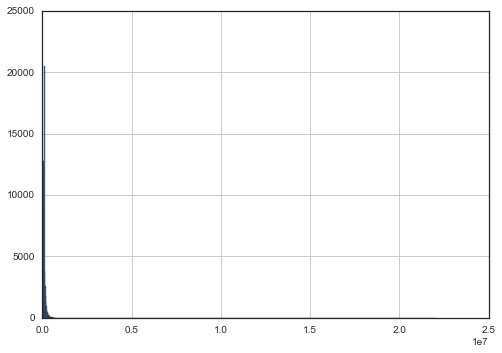

In [24]:
# histogram
santrainder.var38.hist(bins=1000);

In [40]:
# wide range of magnitude orders => log scaling
santrainder['var38_log'] = santrainder['var38'].map(np.log)
santrainder.var38_log.head()

0    10.576564
1    10.805234
2    11.117417
3    11.066763
4    11.672584
Name: var38_log, dtype: float64

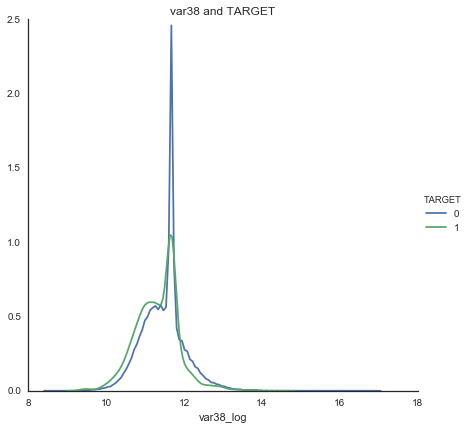

In [41]:
sns.FacetGrid(santrainder, hue='TARGET', size=6) \
   .map(sns.kdeplot, "var38_log") \
   .add_legend()
plt.title('var38_log and TARGET');

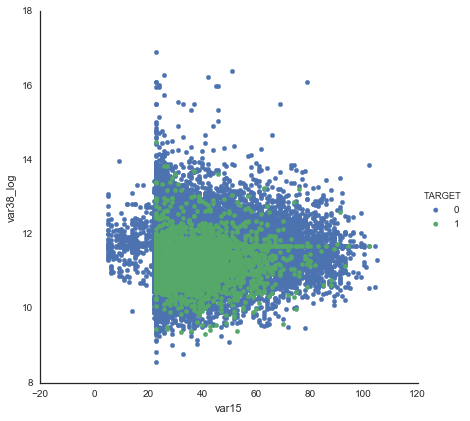

In [47]:
sns.FacetGrid(santrainder, hue='TARGET', size=6) \
    .map(plt.scatter, 'var15', 'var38_log') \
    .add_legend()

In [26]:
# delta features?